# Векторные модели. Word2Vec

+ Firth (1957:11):
You shall know a word by the company it keeps . . .

+ Дистрибутивная гипотеза: значение слова определяется его контекстом — иначе говоря, словами, которые встречаются рядом с этим словом в тексте. 

+ Область лингвистики, которая занимается вычислением степени семантической близости между словами/текстами и т.п. на основании их распределения (дистрибуции) в больших массивах данных (текстовых корпусах) назвается **дистрибутивной семантикой**.

### Word2Vec

Одной из самых известных моделей для работы с дистрибутивной семантикой является word2vec. Технология основана на нейронной сети, предсказывающей вероятность встретить слово в заданном контексте. Этот инструмент был разработан группой исследователей Google в 2013 году, руководителем проекта был Томаш Миколов. Вот две самые главные статьи:

+ [Efficient Estimation of Word Representations inVector Space](https://arxiv.org/pdf/1301.3781.pdf)
+ [Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/abs/1310.4546)

Полученные таким образом вектора называются распределенными представлениями слов, или **эмбеддингами**.

#### Как это обучается?

Мы задаём вектор для каждого слова с помощью матрицы $w$ и вектор контекста с помощью матрицы $W$. По сути, word2vec является обобщающим названием для двух архитектур Skip-Gram и Continuous Bag-Of-Words (CBOW).

+ **CBOW** предсказывает текущее слово, исходя из окружающего его контекста.

+ **Skip-gram**, наоборот, использует текущее слово, чтобы предугадывать окружающие его слова.
  

![cbow_skip-gram](./cbow_skip-gram.png)


#### Как это работает?

Word2vec принимает большой текстовый корпус в качестве входных данных и сопоставляет каждому слову вектор, выдавая координаты слов на выходе. Сначала он создает словарь, «обучаясь» на входных текстовых данных, а затем вычисляет векторное представление слов. Векторное представление основывается на контекстной близости: слова, встречающиеся в тексте рядом с одинаковыми словами (а следовательно, согласно дистрибутивной гипотезе, имеющие схожий смысл), в векторном представлении будут иметь близкие координаты векторов-слов. Для вычисления близости слов используется косинусное расстояние между их векторами.

С помощью дистрибутивных векторных моделей можно строить семантические пропорции (они же аналогии) и решать примеры:

+ король: мужчина = королева: женщина $\Rightarrow$
+ король - мужчина + женщина = королева

![w2v](https://cdn-images-1.medium.com/max/2600/1*sXNXYfAqfLUeiDXPCo130w.png)

Ещё про механику с картинками [тут](https://habr.com/ru/post/446530/)

#### Зачем это нужно?

+ используется для решения семантических задач
+ несколько интересных статей по дистрибутивной семантике:

* [Turney and Pantel 2010](https://jair.org/index.php/jair/article/view/10640)
* [Lenci 2018](https://www.annualreviews.org/doi/abs/10.1146/annurev-linguistics-030514-125254?journalCode=linguistics)
* [Smith 2019](https://arxiv.org/pdf/1902.06006.pdf)
* [Pennington et al. 2014](https://www.aclweb.org/anthology/D14-1162/)
* [Faruqui et al. 2015](https://www.aclweb.org/anthology/N15-1184/)

+ подаётся на вход нейронным сетям
+ используется (по крайней мере использовалась) в Siri, Google Assistant, Alexa, Google Translate...

#### Gensim

Использовать предобученную модель эмбеддингов или обучить свою можно с помощью библиотеки `gensim`. Вот ее [документация](https://radimrehurek.com/gensim/models/word2vec.html). Вообще-то `gensim` — библиотека для тематического моделирования текстов, но один из компонентов в ней — реализация на python алгоритмов из библиотеки word2vec.

Если gensim у вас не стоит, то ставим: `pip install gensim`

In [1]:
import gensim

#### Как обучить свою модель

Обратите внимание, что тренировка модели не включает препроцессинг! Это значит, что избавляться от пунктуации, приводить слова к нижнему регистру, лемматизировать их, проставлять частеречные теги придется до тренировки модели (если, конечно, это необходимо для вашей задачи). Т.е. в каком виде слова будут в исходном тексте, в таком они будут и в модели.

На вход модели даем текстовый файл, каждое предложение на отдельной строчке. Вот игрушечный пример с текстом «Бедной Лизы». Он заранее очищен от пунктуации, приведен к нижнему регистру и лемматизирован.

In [3]:
f = 'liza_lem.txt'
data = gensim.models.word2vec.LineSentence(f)

Инициализируем модель. Основные параметры:

+ данные должны быть итерируемым объектом
+ size — размер вектора,
+ window — размер окна наблюдения,
+ min_count — мин. частотность слова в корпусе,
+ sg — используемый алгоритм обучения (0 — CBOW, 1 — Skip-gram),
+ sample — порог для downsampling'a высокочастотных слов,
+ workers — количество потоков,
+ alpha — learning rate,
+ iter — количество итераций,
+ max_vocab_size — позволяет выставить ограничение по памяти при создании словаря (т.е. если ограничение привышается, то низкочастотные слова будут выбрасываться). Для сравнения: 10 млн слов = 1Гб RAM.

In [6]:
%time model_liza = gensim.models.Word2Vec(data, size=300, window=5, min_count=2)#в последней версии vector_size

2022-11-01 13:38:43,302 : INFO : collecting all words and their counts
2022-11-01 13:38:43,304 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-11-01 13:38:43,308 : INFO : collected 1213 word types from a corpus of 3109 raw words and 392 sentences
2022-11-01 13:38:43,309 : INFO : Loading a fresh vocabulary
2022-11-01 13:38:43,310 : INFO : effective_min_count=2 retains 478 unique words (39% of original 1213, drops 735)
2022-11-01 13:38:43,311 : INFO : effective_min_count=2 leaves 2374 word corpus (76% of original 3109, drops 735)
2022-11-01 13:38:43,313 : INFO : deleting the raw counts dictionary of 1213 items
2022-11-01 13:38:43,314 : INFO : sample=0.001 downsamples 83 most-common words
2022-11-01 13:38:43,314 : INFO : downsampling leaves estimated 1817 word corpus (76.6% of prior 2374)
2022-11-01 13:38:43,316 : INFO : estimated required memory for 478 words and 300 dimensions: 1386200 bytes
2022-11-01 13:38:43,317 : INFO : resetting layer weights
2022-11

CPU times: user 153 ms, sys: 15.7 ms, total: 168 ms
Wall time: 158 ms


Готовую модель нельзя дотренировывать, но можно обучить свою с нуля.

In [7]:
model_liza.init_sims(replace=True)
model_path = "liza.bin"

print("Saving model...")
model_liza.wv.save_word2vec_format(model_path, binary=True)

2022-11-01 13:38:47,924 : INFO : precomputing L2-norms of word weight vectors
2022-11-01 13:38:47,927 : INFO : storing 478x300 projection weights into liza.bin


Saving model...


Смотрим, сколько в модели слов:

In [15]:
len(model_liza.wv.vocab) #, vars(model_liza.wv)

478

In [13]:
print(len(model_liza.wv.index_to_key)

478


In [17]:
model_liza.wv.index2word[1]

'свой'

In [22]:
print(sorted([w for w in model_liza.wv.vocab]))

['анюта', 'армия', 'ах', 'барин', 'бедный', 'белый', 'берег', 'березовый', 'беречь', 'бесчисленный', 'благодарить', 'бледный', 'блеснуть', 'блестящий', 'близ', 'бог', 'богатый', 'большой', 'бояться', 'брать', 'бросать', 'бросаться', 'бывать', 'быть', 'важный', 'ввечеру', 'вдова', 'велеть', 'великий', 'великолепный', 'верить', 'верно', 'весело', 'веселый', 'весна', 'вести', 'весь', 'весьма', 'ветвь', 'ветер', 'вечер', 'взглядывать', 'вздох', 'вздыхать', 'взор', 'взять', 'вид', 'видеть', 'видеться', 'видный', 'вместе', 'вода', 'возвращаться', 'воздух', 'война', 'воображать', 'воображение', 'воспоминание', 'восторг', 'восхищаться', 'время', 'все', 'вслед', 'вставать', 'встречаться', 'всякий', 'высокий', 'выть', 'выходить', 'глаз', 'глубокий', 'гнать', 'говорить', 'год', 'голос', 'гора', 'горе', 'горестный', 'горлица', 'город', 'горький', 'господь', 'гром', 'грусть', 'давать', 'давно', 'далее', 'дверь', 'движение', 'двор', 'девушка', 'дело', 'день', 'деньги', 'деревня', 'деревянный', 'деся

И чему же мы ее научили? Попробуем оценить модель вручную, порешав примеры. Несколько дано ниже, попробуйте придумать свои.

In [23]:
model_liza.wv.most_similar(positive=["смерть", "любовь"], negative=["печальный"], topn=5)

[('пруд', 0.17589719593524933),
 ('велеть', 0.1690881997346878),
 ('роза', 0.15192195773124695),
 ('эраст', 0.15120336413383484),
 ('сквозь', 0.14677993953227997)]

In [24]:
model_liza.wv.most_similar("лиза", topn=3)

[('свой', 0.21134895086288452),
 ('сей', 0.20842617750167847),
 ('день', 0.1961500644683838)]

In [25]:
model_liza.wv.most_similar("любовь", topn=3)

[('эраст', 0.19668173789978027),
 ('пруд', 0.17288167774677277),
 ('лиза', 0.1589827835559845)]

In [26]:
model_liza.wv.similarity("лиза", "эраст")

0.079406135

In [27]:
model_liza.wv.doesnt_match("скорбь грусть слеза улыбка".split())

'грусть'

Видим, что результат так себе!

#### Как использовать готовую модель

#### RusVectōrēs

На сайте RusVectōrēs (https://rusvectores.org/ru/) собраны предобученные на различных данных модели для русского языка, а также можно поискать наиболее близкие слова к заданному, посчитать семантическую близость нескольких слов и порешать примеры с помощью «калькулятором семантической близости».

Для других языков также можно найти предобученные модели — например, модели [fastText](https://fasttext.cc/docs/en/english-vectors.html) и [GloVe](https://nlp.stanford.edu/projects/glove/)

Ещё давайте посмотрим на **векторные романы** https://nevmenandr.github.io/novel2vec/

#### Работа с моделью

Модели word2vec бывают разных форматов:

+ .vec.gz — обычный файл
+ .bin.gz — бинарник

Загружаются они с помощью одного и того же класса `KeyedVectors`, меняется только параметр `binary` у функции `load_word2vec_format`.

Если же эмбеддинги обучены не с помощью word2vec, то для загрузки нужно использовать функцию `load`. Т.е. для загрузки предобученных эмбеддингов `glove`, `fasttext`, `bpe` и любых других нужна именно она.

Скачаем с RusVectōrēs модель для русского языка, обученную на НКРЯ образца 2015 г.

In [6]:
m = '/Users/marinapozidaeva/Downloads/185/model.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)

In [140]:
len(model.vocab), len(ft_model.vocab)

(249565, 192415)

In [7]:
len(model.get_vector('мама_NOUN'))

300

In [74]:
model.vocab

{'так_ADV': <gensim.models.keyedvectors.Vocab at 0x7f8ff1460490>,
 'мочь_VERB': <gensim.models.keyedvectors.Vocab at 0x7f8ff14600a0>,
 'быть_VERB': <gensim.models.keyedvectors.Vocab at 0x7f8ff1460760>,
 'человек_NOUN': <gensim.models.keyedvectors.Vocab at 0x7f90017789a0>,
 'xxxxxx_NUM': <gensim.models.keyedvectors.Vocab at 0x7f8ff1460220>,
 'еще_ADV': <gensim.models.keyedvectors.Vocab at 0x7f9001778cd0>,
 'уже_ADV': <gensim.models.keyedvectors.Vocab at 0x7f90017782b0>,
 'год_NOUN': <gensim.models.keyedvectors.Vocab at 0x7f9001778f40>,
 'xxxxxxxx_NUM': <gensim.models.keyedvectors.Vocab at 0x7f900178ac10>,
 'один_NUM': <gensim.models.keyedvectors.Vocab at 0x7f900178a430>,
 'сказать_VERB': <gensim.models.keyedvectors.Vocab at 0x7f900178aaf0>,
 'знать_VERB': <gensim.models.keyedvectors.Vocab at 0x7f900178a7f0>,
 'время_NOUN': <gensim.models.keyedvectors.Vocab at 0x7f900178a760>,
 'говорить_VERB': <gensim.models.keyedvectors.Vocab at 0x7f900178acd0>,
 'рука_NOUN': <gensim.models.keyedvector

In [145]:
model.distance('мама_NOUN', 'папа_NOUN')

0.22683048248291016

In [146]:
model.distance('интересный_ADJ', 'интересный_ADJ')

0.0

**Мини-исследование**: Давайте протестируем, выделяет ли модель функцию интенсификации в прилагательных? Например, *ужасный курильщик* может интерпретироваться как *человек, который много курит*, а не только как (не столько как) *очень плохой человек-курильщик*. Объединяет ли модель *плохой, ужасный, жуткий, страшный* по отрицательной полярности и объединяет ли она *ужасный, жуткий, страшный* по функции интенсификации?

In [8]:
words = ['хороший_ADJ', 'плохой_ADJ', 'ужасный_ADJ','жуткий_ADJ', 'страшный_ADJ', 'красный_ADJ', 'синий_ADJ']

Частеречные тэги нужны, поскольку это специфика скачанной модели - она была натренирована на словах, аннотированных их частями речи (и лемматизированных). В названиях моделей на `rusvectores` указано, какой тегсет они используют (mystem, upos и т.д.)

Попросим у модели 10 ближайших соседей для каждого слова и коэффициент косинусной близости для каждого:


In [9]:
for word in words:
    # есть ли слово в модели? 
    if word in model:
        print(word)
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
        print('\n')
    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)

хороший_ADJ
[-0.07490682 -0.13763286 -0.0616535   0.06398942 -0.04642392  0.20279509
 -0.05713019 -0.05650204  0.05799595  0.10180186]
хо-роший_ADJ 0.7090424299240112
плохой_ADJ 0.705426812171936
хороший_ADV 0.6968570351600647
неплохой_ADJ 0.6804025769233704
отличный_ADJ 0.6720600128173828
-хороший_ADJ 0.6703852415084839
хоро-ший_ADJ 0.6634120345115662
хорошо_ADJ 0.6584452390670776
хороший_VERB 0.6401939392089844
хорший_ADJ 0.6029923558235168


плохой_ADJ
[ 0.07048123 -0.0528869  -0.01513605 -0.25365075 -0.17671774  0.2035158
 -0.03258831 -0.08201304  0.2876896   0.1547925 ]
плохой_NOUN 0.7729244828224182
плохой_ADV 0.7225555181503296
хороший_ADJ 0.705426812171936
плохо_ADJ 0.6851682662963867
пло-хой_ADJ 0.6603251695632935
скверный_ADJ 0.6548150777816772
плохой_VERB 0.640059232711792
-плохой_ADJ 0.6331822872161865
дурной_ADJ 0.6248953342437744
плохо_NOUN 0.6003490090370178


ужасный_ADJ
[-0.39321187  0.09694887  0.0092224  -0.01658586 -0.11009252  0.00627923
 -0.14846064  0.00143611 -0

Находим косинусную близость пары слов:

In [84]:
print(model.similarity('плохой_ADJ', 'хороший_ADJ'))

0.7054269


In [85]:
print(model.similarity('плохой_ADJ', 'синий_ADJ'))

0.03736089


In [86]:
print(model.similarity('ужасный_ADJ', 'жуткий_ADJ'))

0.82724845


Попробуем составить пропорцию:

+ positive — вектора, которые мы складываем
+ negative — вектора, которые вычитаем

In [87]:
print(model.most_similar(positive=['плохой_ADJ', 'ужасный_ADJ'], negative=['хороший_ADJ'])[0][0])

жуткий_ADJ


In [25]:
model.most_similar(positive=['плохой_ADJ', 'ужасный_ADJ'], negative=['хороший_ADJ'])

[('жуткий_ADJ', 0.7121066451072693),
 ('страшный_ADJ', 0.7044024467468262),
 ('отвратительный_ADJ', 0.6685314178466797),
 ('кошмарный_ADJ', 0.6602193117141724),
 ('ужаснейший_ADJ', 0.6486023664474487),
 ('ужасающий_VERB', 0.6160876750946045),
 ('чудовищный_ADJ', 0.6149851083755493),
 ('ужасный_NOUN', 0.6059579849243164),
 ('омерзительный_ADJ', 0.6029584407806396),
 ('ужасающий_ADJ', 0.5843965411186218)]

In [150]:
print(model.most_similar(positive=['король_NOUN', 'женщина_NOUN'])) #, negative=['мужчина_NOUN'])[0][0])

[('королева_NOUN', 0.7158522009849548), ('королева_ADV', 0.6926079988479614), ('герцогиня_NOUN', 0.6601855754852295), ('мужчина_NOUN', 0.6594823002815247), ('монарх_NOUN', 0.6447399258613586), ('принц_NOUN', 0.6381819844245911), ('король_PROPN', 0.6350463032722473), ('герцог_NOUN', 0.634310245513916), ('принцесса_NOUN', 0.6210218667984009), ('правительница_NOUN', 0.6173374056816101)]


In [10]:
print(model.most_similar(positive=['королева_NOUN']))

[('королева_PROPN', 0.8555597066879272), ('королева_ADV', 0.8205699920654297), ('король_NOUN', 0.7915863990783691), ('принцесса_NOUN', 0.7892545461654663), ('герцогиня_NOUN', 0.7448738813400269), ('королева_ADJ', 0.7223993539810181), ('королев_ADV', 0.7009397745132446), ('король_PROPN', 0.7000781297683716), ('принц_NOUN', 0.690463662147522), ('правительница_NOUN', 0.6903284788131714)]


In [151]:
print(model.most_similar(positive=['король_NOUN'])) #, negative=['мужчина_NOUN'])[0][0])

[('король_PROPN', 0.8265724182128906), ('герцог_NOUN', 0.7919681072235107), ('королева_NOUN', 0.7915863990783691), ('принц_NOUN', 0.7440668344497681), ('монарх_NOUN', 0.7330728769302368), ('королева_ADV', 0.7199681401252747), ('лорд_NOUN', 0.6771354675292969), ('людовик_PROPN', 0.6752188205718994), ('император_NOUN', 0.6718283891677856), ('дофин_NOUN', 0.6717419028282166)]


Найди лишнее!

In [88]:
print(model.doesnt_match('плохой_ADJ хороший_ADJ ужасный_ADJ страшный_ADJ'.split()))

хороший_ADJ


In [117]:
print(model.doesnt_match('плохой_ADJ ужасный_ADJ страшный_ADJ'.split()))

плохой_ADJ


In [152]:
model.most_similar(positive=['ужасно_ADV'], negative=['плохой_ADJ'])

[('жутко_ADV', 0.5729780197143555),
 ('жуткий_ADV', 0.5351186990737915),
 ('безумно_ADV', 0.5218393802642822),
 ('неимоверно_ADV', 0.5154212713241577),
 ('страшно_ADV', 0.4988209009170532),
 ('невероятно_ADV', 0.4850245714187622),
 ('жутко_NOUN', 0.47140535712242126),
 ('адски_ADV', 0.43072834610939026),
 ('нестерпимо_ADV', 0.43012064695358276),
 ('жутко_ADJ', 0.42283594608306885)]

In [116]:
for word, score in model.most_similar(positive=['ужасно_ADV'], negative=['плохой_ADJ']):
    print(f'{score:.4}\t{word}')

0.5586	страшно_ADV
0.4865	безумно_ADV
0.4491	несказанно_ADV
0.433	безмерно_ADV
0.4316	неимоверно_ADV
0.4027	донельзя_ADV
0.3973	необыкновенно_ADV
0.3899	чрезвычайный_ADV
0.3874	чрезвычайность_NOUN
0.3825	жутко_ADV


Что означают полученные результаты для нашего исследования? Объединяет ли модель *плохой, ужасный, жуткий, страшный* по отрицательной полярности и объединяет ли она *ужасный, жуткий, страшный* по функции интенсификации?

### Визуализация

Можно использовать разные методы того, как преобразовать векторы так, чтобы можно было их поместить на двумерное пространство, например, с помощью PCA. В зависимости от того, относительно какого набора слов вы пытаетесь найти оптимально отображение на двумерное пространство, у вас могут получаться разные результаты

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
words = ['хороший_ADJ', 'плохой_ADJ', 'ужасный_ADJ','жуткий_ADJ', 'страшный_ADJ', 'красный_ADJ', 'синий_ADJ']
X = model[words]

In [154]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

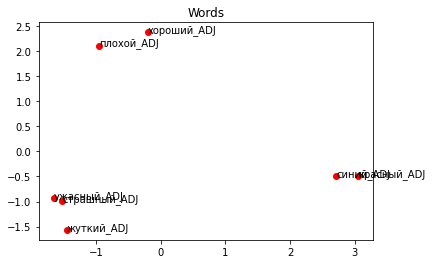

In [155]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

# Заменим слова на синонимы в каком-нибудь тексте!

In [375]:
from pymorphy2 import MorphAnalyzer
import re
morph = MorphAnalyzer()


def get_word_plus_pos(word):
    pos_to_pos = {'INFN': 'VERB', 'ADJF':'ADJ'}
    
    # секретный код
    
    return [word, pos_to_pos.get(pos, pos)]

def get_lemma(word):
    
    # секретный код
    
    return lemma

def get_most_similar_words(word, n=3):
    synonyms = []
    word = get_lemma(word)
    word_plus_pos = '_'.join(get_word_plus_pos(word))
    if word_plus_pos not in model.key_to_index:
        return [word] * n
    
    for word2, sim in model.most_similar(word_plus_pos, topn=100):
        word2_and_pos = word2.split('_') #[0]
        word2_without_pos = word2_and_pos[0]
        word2_clean = get_lemma(re.sub('\W', '', word2_without_pos))
        
        word_pos = word_plus_pos.split('_')[-1]
        word2_pos = word2_and_pos[1]
        if word2_clean == word:
            pass
        else:
            if word2_pos != word_pos:
                pass
            else:
                synonyms.append(word2_clean)
                if len(synonyms) == n:
                    break
    return synonyms
                
def get_synonymous_text(text, version=1):
    text = text.split()
    synonymous_text = []
    for word in text:
        synonymous_text.append(get_most_similar_words(word, n=version)[version -1])
    return ' '.join(synonymous_text)

In [382]:
text = 'я памятник себе воздвиг нерукотворный'


for i in range(5):
    print(get_synonymous_text(text, version=i + 1))

я монумент себя воздвигать рукотворный
я мемориал себя возвести нерукотворенный
я обелиск себя возводить чудотворный
я скульптура себя воздвигнувать пречистый
я надгробие себя воздвиггивать нетленный


In [323]:
words = 'побеждать бежать котик атмосфера лысый кресло апостроф программирование лингвистика компьютерная король королева ужасный хороший'.split()
words = words[::-1]

for word in words:
    synonyms = get_most_similar_words(word)
    if synonyms:
        print('Синоним для слова {}:'.format(word), synonyms)
        print()
    else:
        print()

Синоним для слова хороший: ['плохой', 'неплохой', 'отличный']

Синоним для слова ужасный: ['жуткий', 'страшный', 'кошмарный']

Синоним для слова королева: ['король', 'принцесса', 'герцогиня']

Синоним для слова король: ['герцог', 'королева', 'принц']

Синоним для слова компьютерная: ['сетевой', 'цифровой', 'вычислительный']

Синоним для слова лингвистика: ['филология', 'языкознание', 'социология']

Синоним для слова программирование: ['моделирование', 'информатика', 'конструирование']

Синоним для слова апостроф: ['гласный', 'двоеточие', 'препинание']

Синоним для слова кресло: ['стул', 'диван', 'диванчик']

Синоним для слова лысый: ['плешивый', 'бритый', 'лысоватый']

Синоним для слова атмосфера: ['микроклимат', 'обстановка', 'антураж']

Синоним для слова котик: ['кошечка', 'пёсик', 'котёнок']

Синоним для слова бежать: ['убегать', 'побежать', 'мчаться']

Синоним для слова побеждать: ['победить', 'одерживать', 'выигрывать']



# FastText

In [1]:
import gensim

In [11]:
path = '/Users/marinapozidaeva/Downloads/187/model.model'
ft_model = gensim.models.keyedvectors.FastTextKeyedVectors.load(path)

In [13]:
'плохий' in set(ft_model.vocab)

False

In [12]:
ft_model.most_similar('плохий')

[('плохи', 0.7942331433296204),
 ('плохо', 0.7477477788925171),
 ('плохое', 0.7439548373222351),
 ('плохомя', 0.7422434091567993),
 ('плохо-то', 0.7096343636512756),
 ('плохиша', 0.6853170394897461),
 ('плохой', 0.6837761402130127),
 ('плохиш', 0.6801854372024536),
 ('плохоготец', 0.6760127544403076),
 ('плоховато', 0.6277337074279785)]

In [127]:
sorted(ft_model.vocab.items(), key=lambda x:len(x[0]))

[('ob', <gensim.models.keyedvectors.Vocab at 0x7f8fe7d66cd0>),
 ('а6', <gensim.models.keyedvectors.Vocab at 0x7f8fe7d7c400>),
 ('хл', <gensim.models.keyedvectors.Vocab at 0x7f8fe7d82520>),
 ('/b', <gensim.models.keyedvectors.Vocab at 0x7f8fe7d875b0>),
 ("'д", <gensim.models.keyedvectors.Vocab at 0x7f8fa75d3d90>),
 ('де', <gensim.models.keyedvectors.Vocab at 0x7f8fa75d8ee0>),
 ('эц', <gensim.models.keyedvectors.Vocab at 0x7f8fa75d8fd0>),
 ('па', <gensim.models.keyedvectors.Vocab at 0x7f8fa75e82b0>),
 ('юл', <gensim.models.keyedvectors.Vocab at 0x7f8fa75e8580>),
 ('ие', <gensim.models.keyedvectors.Vocab at 0x7f8fa75e89d0>),
 ('ёй', <gensim.models.keyedvectors.Vocab at 0x7f8fa75f2880>),
 ('бф', <gensim.models.keyedvectors.Vocab at 0x7f8fa75f6f70>),
 ('иб', <gensim.models.keyedvectors.Vocab at 0x7f8fa760a0a0>),
 ('3*', <gensim.models.keyedvectors.Vocab at 0x7f8fa760adf0>),
 ('лв', <gensim.models.keyedvectors.Vocab at 0x7f8fa760fdc0>),
 ('ло', <gensim.models.keyedvectors.Vocab at 0x7f8fa761

In [158]:
sorted(ft_model.vocab.items(), key=lambda x:len(x[0]), reverse=True)[10000:]

[('конспиративный', <gensim.models.keyedvectors.Vocab at 0x7f8c9178d0d0>),
 ('архипастырский', <gensim.models.keyedvectors.Vocab at 0x7f8c9178dd90>),
 ('фундаментализй', <gensim.models.keyedvectors.Vocab at 0x7f8c91792310>),
 ('губернаторство', <gensim.models.keyedvectors.Vocab at 0x7f8c91792970>),
 ('запломбировать', <gensim.models.keyedvectors.Vocab at 0x7f8c91792eb0>),
 ('обновленческий', <gensim.models.keyedvectors.Vocab at 0x7f8c9179b0a0>),
 ('четырехместный', <gensim.models.keyedvectors.Vocab at 0x7f8c9179b910>),
 ('подготовленный', <gensim.models.keyedvectors.Vocab at 0x7f8c917a1280>),
 ('уплотнительный', <gensim.models.keyedvectors.Vocab at 0x7f8c917a1a00>),
 ('борис::заходер', <gensim.models.keyedvectors.Vocab at 0x7f8c917a5430>),
 ('неклассический', <gensim.models.keyedvectors.Vocab at 0x7f8c917ab1f0>),
 ('саквояжтраница', <gensim.models.keyedvectors.Vocab at 0x7f8c917ab580>),
 ('пол::маккартни', <gensim.models.keyedvectors.Vocab at 0x7f8c917b0700>),
 ('развернуваться', <gens

#### Задание 1

+ Возьмите небольшой кусочек текста или стихотворение.
+ Дополните функцию для замены слов на их синонимы
+ Замените все слова в нём на их ближайших соседей из нашей модели.
+ Прокомментируйте результат.

#### Задание 2

+ Возьмите интересный Вам большой текст (например, Война и мир)
+ Лемматизируйте текст, отчистите от пунктуации и служебной информации и обучите на нем модель word2vec (поэкспериментируйте с размером окна, с длиной вектора). 
+ Найдите по 5 ближайших слов к нескольким интересующим Вас словам. Обязательно попробуйте взять слова различной частеречной принадлежности, различных семантических классов (абстрактные слова, экспрессивы). Учтите, что слова может не быть в модели!
+ Найдите по 5 "далёких" слов к нескольким интересующим Вас словам. Обязательно попробуйте взять слова различной частеречной принадлежности, различных семантических классов (абстрактные слова, экспрессивы).
+ Прокомментируйте результат.